# Importing Libraries

In [2]:
import glob

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
import librosa

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn.svm import SVC

# Loading Datasets

In [7]:
files_tr = glob.glob("Hemanta_Jagjit_Sanu_Kishore_Train\*.wav")

In [8]:
files_tr

['Hemanta_Jagjit_Sanu_Kishore_Train\\HM_01.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_02.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_03.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_04.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_05.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_16.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_17.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_18.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_19.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_20.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_21.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_22.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_23.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_24.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_25.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_26.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_27.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_28.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_29.wav',
 'Hemanta_Jagjit_Sanu_Kishore_Train\\HM_30.wav',
 'Hemanta_Jagjit_San

In [9]:
L = []
for i in files_tr:
    i = i.split('\\')[1].split('_')[0]
    if i.upper() == 'HM':
        L.append(0)
    elif i.upper() == 'JG':
        L.append(1)
    elif i.upper() == 'KK':
        L.append(2)
    elif i.upper() == 'KS':
        L.append(3)
len(L)

80

In [10]:
arr_train = np.empty((21540))
 
for file in files_tr:
    y, sr = librosa.load(file)    
    s =  librosa.feature.mfcc(y, sr=sr)    
    s = s.flatten()
    arr_train = np.vstack((arr_train, s))

In [11]:
X = arr_train[1:]
X.shape

(80, 21540)

In [12]:
Y = np.array(L)
Y.shape

(80,)

In [13]:
files_test = glob.glob("Hemanta_Jagjit_Sanu_Kishore_Test\*.wav")

In [14]:
B = []
for i in files_test:
    i = i.split('\\')[1].split('_')[0]
    if i.upper() == 'HM':
        B.append(0)
    elif i.upper() == 'JG':
        B.append(1)
    elif i.upper() == 'KK':
        B.append(2)
    elif i.upper() == 'KS':
        B.append(3)

In [15]:
Y_test = np.array(B)
Y_test.shape

(40,)

In [16]:
arr_test = np.empty((21540))
for file in files_test:
    y, sr = librosa.load(file)    
    s =  librosa.feature.mfcc(y, sr=sr)    
    s = s.flatten()
    arr_test = np.vstack((arr_test, s))

In [17]:
X_test = arr_test[1:]
X_test.shape

(40, 21540)

In [56]:
X_test[:5]

array([[-305.75056696, -320.80851967, -335.82774872, ...,  -15.09739006,
         -18.10605644,  -10.88618047],
       [-323.96191678, -347.8397676 , -406.41230394, ...,   -9.24755127,
         -10.26177757,   -4.66800841],
       [-466.26634159, -398.09041311, -374.00862427, ...,  -11.94595115,
          -6.77134671,   -7.7409955 ],
       [-132.06915715, -159.7989109 , -187.91110299, ...,    2.20130531,
           3.82740354,    7.61286937],
       [-245.32725208, -257.68249881, -271.58093887, ...,   -9.68325906,
          -9.75600938,  -14.71579672]])

# Fitting Dataset to Model

In [57]:
logis=LogisticRegression()

In [58]:
logis.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
predictions=logis.predict(X_test)

In [60]:
score=logis.score(X_test,Y_test)
score

0.72499999999999998

In [61]:
predictions-Y_test

array([ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0, -2,  0,  0,  0, -1, -1,  0, -2,  0, -1, -1, -1,  0,
        0,  0, -1, -1,  0,  0])

# Confusion Matrix of model on Raw Data

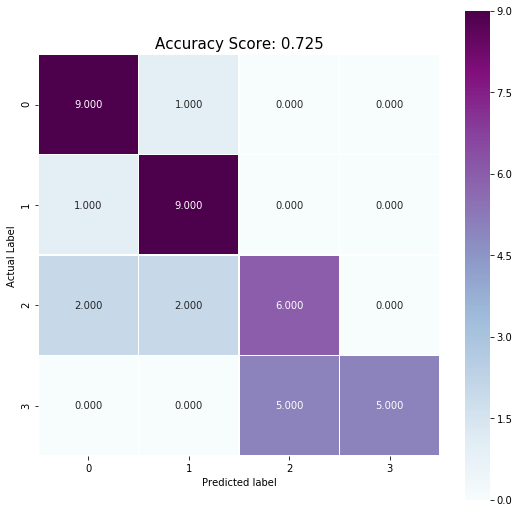

In [62]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt= ".3f", linewidths= .5, square = True, cmap='BuPu');
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)

# Preprocessing Data for higher accuracy

In [63]:
from sklearn import preprocessing

In [64]:
scaler=preprocessing.Binarizer().fit(X)
X_binan=scaler.transform(X)
scaler=preprocessing.Binarizer().fit(X_test)
X_test_binan=scaler.transform(X_test)

In [65]:
logis.fit(X_binan,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Improved Score

Improved score of 90% accuracy on Processed Data with Logistic Regression Model

In [66]:
score=logis.score(X_test_binan,Y_test)
score

0.90000000000000002

In [67]:
predictions=logis.predict(X_test_binan)

In [68]:
predictions-Y_test

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -2,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -2,  0,
        0,  0,  0, -1,  0,  0])

#  Confusion Matrix of Model on Processed Data

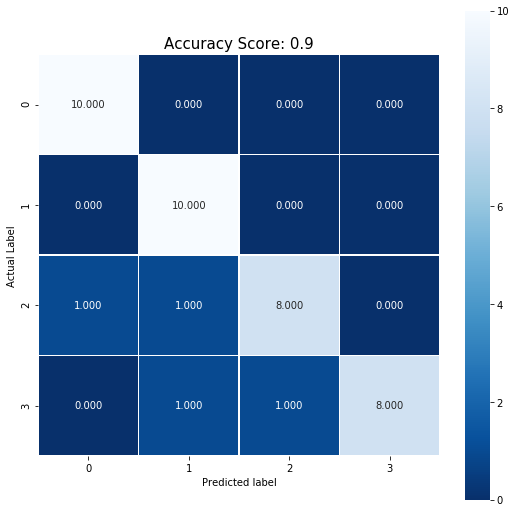

In [69]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt= ".3f", linewidths= .5, square = True, cmap='Blues_r');
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)

# Using SVM

Using Support vector Classifier on unprocessed data

In [70]:
svc=SVC()

In [71]:
svc.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [72]:
score=svc.score(X_test,Y_test)
score

0.77500000000000002

In [73]:
predictions=svc.predict(X_test)

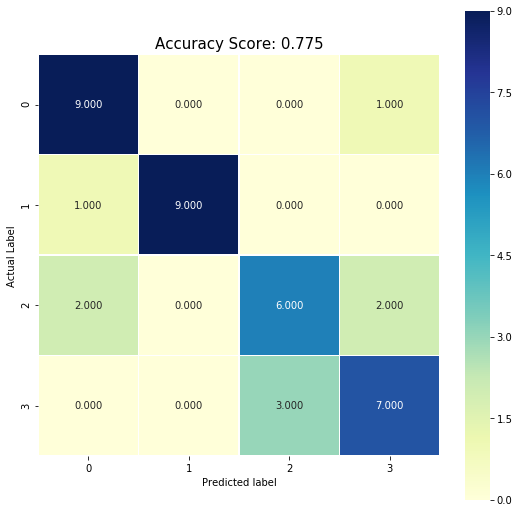

In [74]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt= ".3f", linewidths= .5, square = True, cmap='YlGnBu');
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15)

In [75]:
targetnames=['Hemanta','Jagjit','Kishore kumar','Kumar Shanu']

In [76]:
for a in predictions:
    print(targetnames[a])

Hemanta
Hemanta
Hemanta
Hemanta
Hemanta
Hemanta
Hemanta
Hemanta
Hemanta
Kumar Shanu
Jagjit
Hemanta
Jagjit
Jagjit
Jagjit
Jagjit
Jagjit
Jagjit
Jagjit
Jagjit
Kishore kumar
Kumar Shanu
Kishore kumar
Kishore kumar
Hemanta
Kishore kumar
Kumar Shanu
Kishore kumar
Hemanta
Kishore kumar
Kumar Shanu
Kumar Shanu
Kumar Shanu
Kumar Shanu
Kumar Shanu
Kumar Shanu
Kumar Shanu
Kishore kumar
Kishore kumar
Kishore kumar
